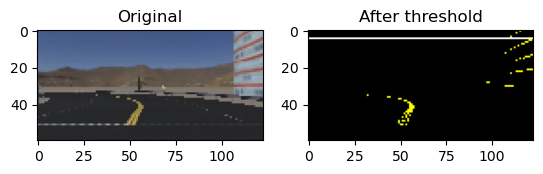

In [ ]:
"""Image Tresholding"""

import numpy as np
import matplotlib.pyplot as plt
import cv2


def pixel_difference(pixel1, pixel2):
    squared_dist = np.sum((pixel1 - pixel2) ** 2, axis=0)
    return np.sqrt(squared_dist)


def colour_threshold(image, colour, threshold):
    binary_image = np.zeros(image.shape, dtype=np.uint8)
    binary_image[:][:][4] = 255  # alpha channel
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixel = image[r][c][:]
            difference = pixel_difference(colour, pixel)
            if difference < threshold:
                binary_image[r][c][:-1] = 255
    return binary_image


if __name__ == "__main__":
    image_bgr = cv2.imread("image_from_sim.png")
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

    # Binary image
    yellow_pixel = np.array([25, 127, 127])
    threshold = 40  # TODO: modify this value and understand what changes
    binary_image = colour_threshold(image_hsv, yellow_pixel, threshold)

    # Plot
    f, axarr = plt.subplots(1, 2)
    axarr[0].title.set_text("Original")
    axarr[0].imshow(image_rgb)
    axarr[1].title.set_text("After threshold")
    axarr[1].imshow(binary_image)
    plt.show()
